In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [10]:
def read_file(path):
    df= pd.read_csv(path, sep=';')
    return df

In [11]:

def CatEncode(self):
#    bool_feat=['y']
    categorical_feats=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    #Converting dependent variable categorical to dummy
#    for x in bool_feat:
#        df[x] = pd.get_dummies(df[x], columns = [x], prefix = [x], drop_first = True)
    self.target = pd.get_dummies(self['y'], columns = ['y'], prefix = ['y'], drop_first = True)    
    
    def dropna(self):
        self = self.replace('Unknown', np.nan)
        self = self.dropna()
    
    def age(dataframe):
        dataframe.loc[dataframe['age'] <= self['age'].quantile(q = 0.25), 'age'] = 1
        dataframe.loc[(dataframe['age'] > self['age'].quantile(q = 0.25)) & (dataframe['age'] <= self['age'].quantile(q = 0.50)), 'age'] = 2
        dataframe.loc[(dataframe['age'] > self['age'].quantile(q = 0.50)) & (dataframe['age'] <= self['age'].quantile(q = 0.75)), 'age'] = 3
        dataframe.loc[(dataframe['age'] > self['age'].quantile(q = 0.75)) & (dataframe['age'] <= (self['age'].quantile(q = 0.75) + 1.5*(self['age'].quantile(q = 0.75) - self['age'].quantile(q = 0.25)))), 'age'] = 4
        dataframe.loc[(dataframe['age'] > (self['age'].quantile(q = 0.75) 
                       + 1.5*(self['age'].quantile(q = 0.75) 
                              - self['age'].quantile(q = 0.25)))) & (dataframe['age'] <= self['age'].quantile(q = 1.00)), 'age'] = 5
        return dataframe
    age(self);
    self['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)
    def duration(data):
        
        #data.loc[(data['duration']) < self['duration'].quantile(q = 0.25), 'duration'] = 1
        
        data.loc[(data['duration']) <= self['duration'].quantile(q = 0.25), 'duration'] = 1
        data.loc[(data['duration'] > self['duration'].quantile(q = 0.25)) & (data['duration'] <= self['duration'].quantile(q = 0.50))  , 'duration']    = 2
        data.loc[(data['duration'] > self['duration'].quantile(q = 0.50)) & (data['duration'] <= self['duration'].quantile(q = 0.75))  , 'duration']   = 3
        data.loc[(data['duration'] > self['duration'].quantile(q = 0.75)) & (data['duration'] <= self['duration'].quantile(q = 0.75) 
                                             + 1.5*(self['duration'].quantile(q = 0.75) 
                                                    - self['duration'].quantile(q = 0.25))), 'duration'] = 4
        data.loc[data['duration']  > self['duration'].quantile(q = 0.75) + 1.5*(self['duration'].quantile(q = 0.75) 
                                                                              - self['duration'].quantile(q = 0.25)), 'duration'] = 5

        return data
    duration(self);
    
    # Label encoder order is alphabetical
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    for x in categorical_feats:
        self[x] = labelencoder_X.fit_transform(self[x]) 
    return self



In [12]:
def test_train_split(X,y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import confusion_matrix, accuracy_score
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [13]:
def log_model(X_train, y_train):

    from sklearn.linear_model import LogisticRegression
    logmodel = LogisticRegression() 
    logmodel.fit(X_train,y_train)
#    logpred = logmodel.predict(X_test)


#    print(confusion_matrix(y_test, logpred))
#    LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
#    print("Accuracy on Testing set of logistic model: ",accuracy_score(y_test, logpred))
#    print("Accuracy on Traning set of logistic model: ",logmodel.score(X_train,y_train))
    
    return logmodel

In [14]:
def dtree_model(X_train, y_train):

    from sklearn.tree import DecisionTreeClassifier
    dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
    dtree.fit(X_train, y_train)
#    dtreepred = dtree.predict(X_test)

#    print(confusion_matrix(y_test, dtreepred))
#    print(round(accuracy_score(y_test, dtreepred),2)*100)
#    DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
#    print("Accuracy on Traning set of decision tree model: ",dtree.score(X_train,y_train))
#    print("Accuracy on Testing set of decision tree model: ",accuracy_score(y_test, dtreepred))
    
    return dtree

In [15]:
def plot_AUC(logmodel, dtree, X_test, y_test):
    from sklearn import metrics
    fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
    #Logistic
    probs = logmodel.predict_proba(X_test)
    preds = probs[:,1]
    fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
    roc_auclog = metrics.auc(fprlog, tprlog)

    ax.plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_title('Receiver Operating Characteristic Logistic ',fontsize=10)
    ax.set_ylabel('True Positive Rate',fontsize=20)
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.legend(loc = 'lower right', prop={'size': 16})
    
    probs = dtree.predict_proba(X_test)
    preds = probs[:,1]
    fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
    roc_aucdtree = metrics.auc(fprdtree, tprdtree)

    ax1.plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
    ax1.plot([0, 1], [0, 1],'r--')
    ax1.set_title('Receiver Operating Characteristic Decision Tree ',fontsize=10)
    ax1.set_ylabel('True Positive Rate',fontsize=20)
    ax1.set_xlabel('False Positive Rate',fontsize=15)
    ax1.legend(loc = 'lower right', prop={'size': 16})

    plt.subplots_adjust(wspace=1)

[[7136  167]
 [ 618  317]]
0.9060394537177542
Accuracy on Testing set of logistic model:  0.9047098810390871
Accuracy on Traning set of logistic model:  0.9062215477996965
[[6751  552]
 [ 523  412]]
0.8710773899848254
Accuracy on Traning set of decision tree model:  0.997298937784522
Accuracy on Testing set of decision tree model:  0.8695071619325079


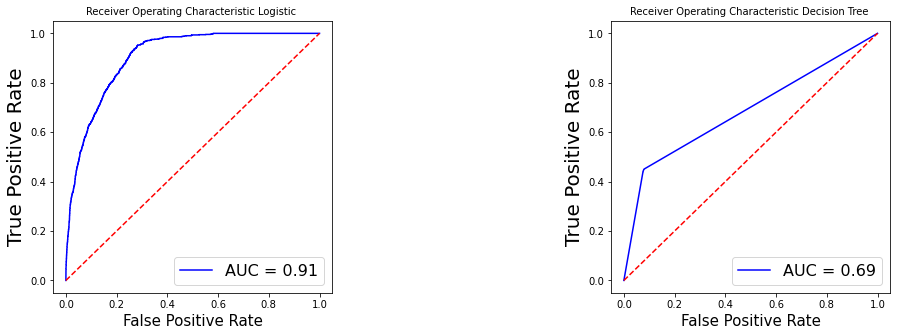

In [16]:
def main():
    df= read_file('bank-additional-full.csv')
    df=CatEncode(df)
    y= df.target
    X= df.iloc[:,0:20]

    X_train, X_test, y_train, y_test = test_train_split(X,y)

    logmodel = LogisticRegression() 
    logmodel.fit(X_train,y_train)
    logpred = logmodel.predict(X_test)
    
    
    k_fold = KFold(n_splits=10, shuffle=True, random_state=5)

    print(confusion_matrix(y_test, logpred))
    LOGCV=(cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
    print(LOGCV)
    print("Accuracy on Testing set of logistic model: ",accuracy_score(y_test, logpred))
    print("Accuracy on Traning set of logistic model: ",logmodel.score(X_train,y_train))
    
    dtree = dtree_model(X_train, y_train)
    dtreepred = dtree.predict(X_test)
    print(confusion_matrix(y_test, dtreepred))
    #print(round(accuracy_score(y_test, dtreepred),2)*100)
    DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
    print(DTREECV)
    print("Accuracy on Traning set of decision tree model: ",dtree.score(X_train,y_train))
    print("Accuracy on Testing set of decision tree model: ",accuracy_score(y_test, dtreepred))
    
    
    plot_AUC(logmodel, dtree, X_test, y_test)
#    y_predict_proba=predict_proba(model,X)
#    ROC_AUC(y_predict_proba, y_true)

    
if __name__ == '__main__':
    main()